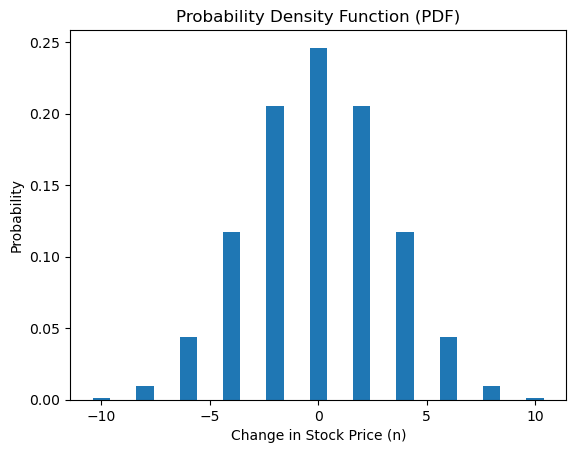

Mean stock price after 10 days: 0.0
Variance of stock price after 10 days: 10.0


In [1]:
#Q.3
import numpy as np
import matplotlib.pyplot as plt
import math

# Function to calculate binomial coefficient
def binom_coeff(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

# Function to calculate probability of stock price after N days
def calculate_probability(N, n, p):
    k = (N + n) // 2  # use integer division
    return binom_coeff(N, k) * (p ** k) * ((1 - p) ** (N - k))

# Plot PDF for different values of n
def plot_PDF(N, p):
    n_values = np.arange(-N, N+1, 2)
    probabilities = [calculate_probability(N, n, p) for n in n_values]
    plt.bar(n_values, probabilities)
    plt.xlabel('Change in Stock Price (n)')
    plt.ylabel('Probability')
    plt.title('Probability Density Function (PDF)')
    plt.show()

# Simulate stock price trend for p = 0.5
def simulate_stock_price(N, p, num_simulations):
    prices = []
    for _ in range(num_simulations):
        price = 100
        for _ in range(N):
            if np.random.rand() < p:
                price += 1
            else:
                price -= 1
        prices.append(price)
    return prices

# Calculate mean and variance of stock price after N days
def calculate_mean_and_variance(N, p):
    mean = N * (2*p - 1) * 100
    variance = N * (4*p*(1-p))
    return mean, variance

# Example usage
N = 10
p = 0.5
num_simulations = 100

plot_PDF(N, p)

stock_prices = simulate_stock_price(N, p, num_simulations)
mean, variance = calculate_mean_and_variance(N, p)

print("Mean stock price after", N,"days:", mean)
print("Variance of stock price after",N,"days:",variance)

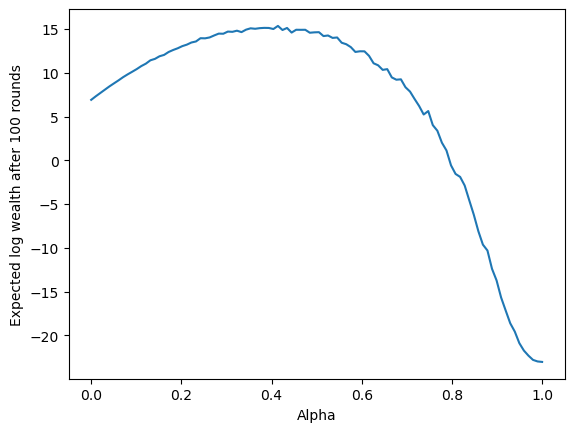

The value of Alpha:0.4444444444444445


In [2]:
#Q.4
import numpy as np
import matplotlib.pyplot as plt

# Initial wealth and probability
I0 = 1000
p = 0.7

# Function to calculate wealth after N rounds
def wealth_after_N_rounds(alpha, I0, p, N):
    wealth = I0
    for _ in range(N):
        if np.random.rand() < p:
            wealth = alpha * (2 * wealth) + (1 - alpha) * wealth
        else:
            wealth = (1 - alpha) * wealth
    return wealth

# Function to calculate logarithm of wealth after N rounds
def log_wealth_after_N_rounds(alpha, I0, p, N):
    wealth = wealth_after_N_rounds(alpha, I0, p, N)
    return np.log(wealth + 1e-10)  # add a small constant to avoid log(0)

# Function to find alpha
def find_alpha(I0, p, N):
    alphas = np.linspace(0, 1, 100)
    expected_log_wealths = [np.mean([log_wealth_after_N_rounds(alpha, I0, p, N) for _ in range(1000)]) for alpha in alphas]
    return alphas[np.argmax(expected_log_wealths)]

# Numerical simulation
alphas = np.linspace(0, 1, 100)
expected_log_wealths = [np.mean([log_wealth_after_N_rounds(alpha, I0, p, 100) for _ in range(1000)]) for alpha in alphas]

# Plot results
plt.plot(alphas, expected_log_wealths)
plt.xlabel('Alpha')
plt.ylabel('Expected log wealth after 100 rounds')
plt.show()

# Print alpha
print(f'The value of Alpha:{find_alpha(I0,p,100)}')